In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:

mu, sigma = 50, 10
s = np.random.normal(mu, sigma, 100)

In [3]:
print(s)

[46.72538675 60.98291083 52.59324274 46.22685401 52.14756709 54.10874162
 55.40001536 51.53892499 55.28490871 48.50654222 40.23554537 42.0380379
 48.01416771 68.42147021 33.66327761 52.00458786 37.88895112 62.31624722
 60.47580076 43.2388615  51.96165768 51.2233302  46.18899487 40.72573383
 70.5311061  47.96863369 64.4871841  56.50606677 62.45384713 58.48841954
 44.34379645 47.02713031 38.98262612 26.65335093 43.3111214  47.02881558
 41.39048797 66.54068632 43.24840763 43.83974877 52.1478799  57.655086
 47.22954307 29.31089604 23.37764275 40.19076606 69.26679559 43.34892911
 34.78871052 66.62776932 56.26971531 42.71456541 47.02693793 39.35546065
 54.71986763 34.92904394 38.88826739 50.03726238 48.14777055 46.76230462
 41.52142227 54.02621557 50.62493142 55.38818747 50.86458608 59.10089018
 49.89410406 37.25263584 63.67047071 48.53167972 54.28324637 52.68576642
 48.9010437  45.21061127 57.39560499 45.60802385 51.83393897 67.93600483
 72.1434183  47.16911148 44.81459202 46.30315663 48.04

(array([ 2.,  2.,  7., 17., 24., 24.,  9.,  6.,  7.,  2.]),
 array([23.37764275, 28.7482287 , 34.11881466, 39.48940061, 44.85998657,
        50.23057252, 55.60115847, 60.97174443, 66.34233038, 71.71291634,
        77.08350229]),
 <BarContainer object of 10 artists>)

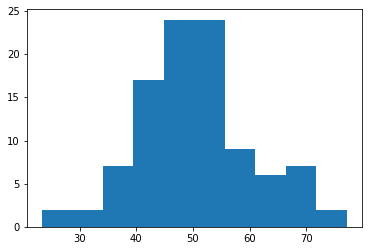

In [4]:
plt.hist(s)

In [5]:

s[85] = 120
s[15] = -120

In [6]:

df = pd.DataFrame(s,columns=['Data'])
df

,Data
0,46.725387
1,60.982911
2,52.593243
3,46.226854
4,52.147567
...,...
95,60.662578
96,40.803435
97,52.379419
98,51.802113


In [7]:

for col in df.columns:
    col_zscore = col + '_zscore'

In [9]:
print(df.columns)

Index(['Data'], dtype='object')


In [8]:
print(col_zscore)

Data_zscore


In [16]:
for col in df.columns:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std() # calculation of z-score ==> (value-mean)/sd

In [12]:
df[col_zscore]

0    -0.113582
1     0.573038
2     0.169005
3    -0.137590
4     0.147542
        ...   
95    0.557612
96   -0.398773
97    0.158708
98    0.130906
99   -0.400323
Name: Data_zscore_zscore, Length: 100, dtype: float64

In [17]:
df

,Data,Data_zscore,Data_zscore_zscore,Data_zscore_zscore_zscore
0,46.725387,-0.113582,-0.113582,-0.113582
1,60.982911,0.573038,0.573038,0.573038
2,52.593243,0.169005,0.169005,0.169005
3,46.226854,-0.137590,-0.137590,-0.137590
4,52.147567,0.147542,0.147542,0.147542
...,...,...,...,...
95,60.662578,0.557612,0.557612,0.557612
96,40.803435,-0.398773,-0.398773,-0.398773
97,52.379419,0.158708,0.158708,0.158708
98,51.802113,0.130906,0.130906,0.130906


In [19]:
df.drop(['Data_zscore_zscore','Data_zscore_zscore_zscore'],axis=1)

,Data,Data_zscore
0,46.725387,-0.113582
1,60.982911,0.573038
2,52.593243,0.169005
3,46.226854,-0.137590
4,52.147567,0.147542
...,...,...
95,60.662578,0.557612
96,40.803435,-0.398773
97,52.379419,0.158708
98,51.802113,0.130906


In [20]:
df['Data']

0     46.725387
1     60.982911
2     52.593243
3     46.226854
4     52.147567
        ...    
95    60.662578
96    40.803435
97    52.379419
98    51.802113
99    40.771253
Name: Data, Length: 100, dtype: float64

In [24]:
df['Data_zscore']> 3

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Data_zscore, Length: 100, dtype: bool

In [26]:
df['outlier'] = (abs(df['Data_zscore'])> 3) # any row value have value greater than 3 is classifed as outlier

In [27]:
df['outlier']

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: outlier, Length: 100, dtype: bool

In [28]:
df['outlier'] = (abs(df['Data_zscore'])> 3).astype(int)

In [31]:
df['outlier']

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: outlier, Length: 100, dtype: int32

In [32]:
df

,Data,Data_zscore,Data_zscore_zscore,Data_zscore_zscore_zscore,outlier
0,46.725387,-0.113582,-0.113582,-0.113582,0
1,60.982911,0.573038,0.573038,0.573038,0
2,52.593243,0.169005,0.169005,0.169005,0
3,46.226854,-0.137590,-0.137590,-0.137590,0
4,52.147567,0.147542,0.147542,0.147542,0
...,...,...,...,...,...
95,60.662578,0.557612,0.557612,0.557612,0
96,40.803435,-0.398773,-0.398773,-0.398773,0
97,52.379419,0.158708,0.158708,0.158708,0
98,51.802113,0.130906,0.130906,0.130906,0


In [35]:
df.drop(['Data_zscore_zscore','Data_zscore_zscore_zscore'],axis=1,inplace=True)

In [36]:
df

,Data,Data_zscore,outlier
0,46.725387,-0.113582,0
1,60.982911,0.573038,0
2,52.593243,0.169005,0
3,46.226854,-0.137590,0
4,52.147567,0.147542,0
...,...,...,...
95,60.662578,0.557612,0
96,40.803435,-0.398773,0
97,52.379419,0.158708,0
98,51.802113,0.130906,0


In [39]:
df.loc[df.outlier==1]

,Data,Data_zscore,outlier
15,-120.0,-8.142813,1
85,120.0,3.415208,1


In [40]:
df.tail()

,Data,Data_zscore,outlier
95,60.662578,0.557612,0
96,40.803435,-0.398773,0
97,52.379419,0.158708,0
98,51.802113,0.130906,0
99,40.771253,-0.400323,0


In [41]:
print ("Print number of outliers = " +str(df.outlier.value_counts()[1]))

Print number of outliers = 2
